# Data Analysis for the GMSC project

Mettre le livre MachineLearning Mastery With Python en application (I à VII) sur le projet GiveMeSomeCredit

On importe nos librairies/modules et on lit notre fichier train de base, fourni par Kaggle:
- mieux comprendre les données à l'aide de statistiques descriptives
- à l'aide de visualisations diverses 

In [32]:
from bigml.api import BigML
from matplotlib import pyplot
import numpy as np
from pandas import DataFrame, read_csv, Series, set_option

data = read_csv('cs-training.csv', index_col=0)

#### Understand your data with Descriptive Statistics

In [31]:
peek = data.head(20) 
shape = data.shape
types = data.dtypes

set_option('display.width', 100)
set_option('precision', 3)

description = data.describe()

SeriousDlqin2yrs_counts = data.groupby('SeriousDlqin2yrs').size()

correlations = data.corr(method='pearson')

skew = data.skew()

# SeriousDlqin2yrs_counts
# peek
# shape
# types
# description
# correlations
# skew

#### Understand your data with Vizualisation

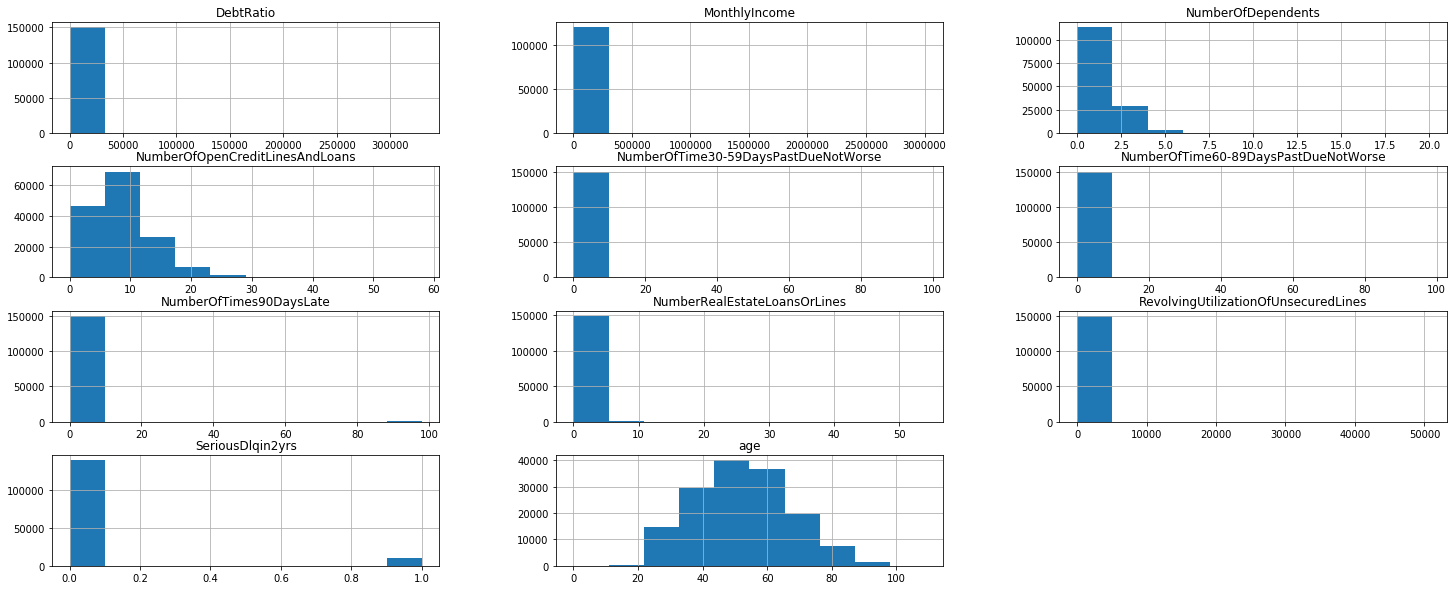

In [44]:
# Histograms

data.hist(figsize=(25,10)) # figsize=() nous permet de configurer la taille de notre histogramme
pyplot.show()

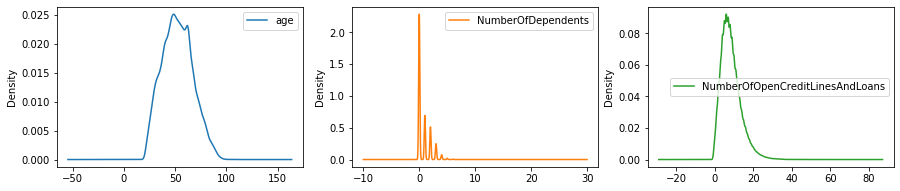

In [75]:
# Density Plots

data[['age', 'NumberOfDependents', 'NumberOfOpenCreditLinesAndLoans']].plot(kind='density', subplots=True,
                                                                          layout=(3,3), figsize=(15,10), sharex=False)
pyplot.show()

We are getting a quick idea of the distribution of each attribute we are taking a look at.

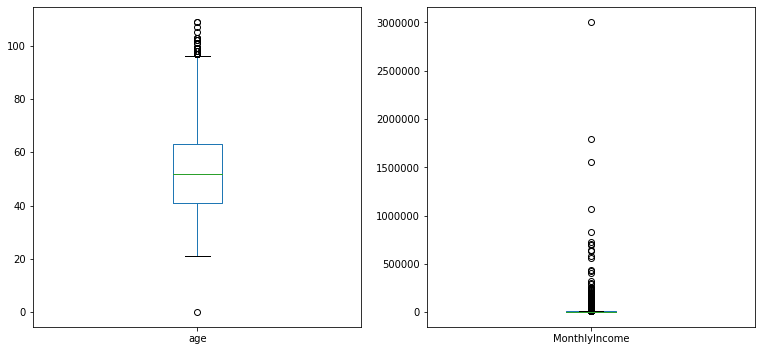

In [59]:
# Box and Whisker Plots

data[['age','MonthlyIncome']].plot(kind='box', subplots=True, layout=(3,3), figsize=(20,20), sharex=False, sharey=False)
pyplot.show()

The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values.
We can see on the second box that there are at least 4 outliers we should take a look on.

#### Multivariate Plots

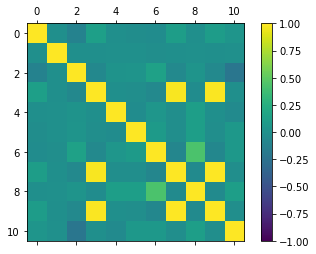

In [72]:
# Correction Matrix Plot

from bigml.api import BigML
from matplotlib import pyplot as plt
import numpy as np
from pandas import DataFrame, read_csv, Series, set_option

data = read_csv('cs-training.csv', index_col=0)
names = ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
correlations = data.corr()

# plot correlation matrix

fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

# This recipe cam be made more generic by removing labels
# ticks = np.arange(0,9,1)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# ax.set_xticklabels(names)
# ax.set_yticklabels(names)
# pyplot.show()

pyplot.show()


Some machine learning algorithms like linear and logistic regression can have poor performance if there are highly correlated input variables in your data.
It could be interresting to take a look at those which are highly correlated.